/home/justo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


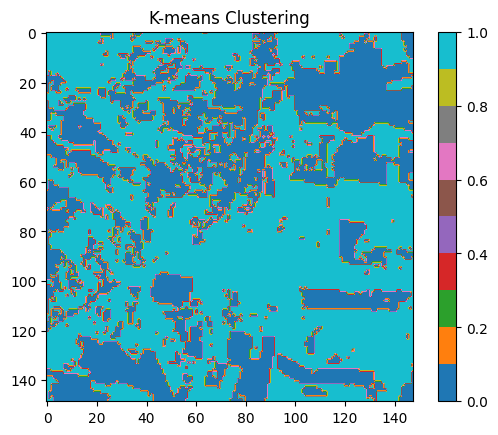

In [1]:
import numpy as np
import rasterio
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import subprocess
import os

carpeta_recortadas = "ImagenesRecortadas"
# Cargar las bandas necesarias
band5_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B5.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band6_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B6.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band7_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B7.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")

with rasterio.open(os.path.abspath(band5_path)) as band5:
    nir = band5.read(1).astype('float32')

with rasterio.open(band6_path) as band6:
    swir1 = band6.read(1).astype('float32')

with rasterio.open(band7_path) as band7:
    swir2 = band7.read(1).astype('float32')

# Calcular NDBI
ndbi = (swir1 - nir) / (swir1 + nir)

# Calcular NDBaI
ndbai = (swir1 - swir2) / (swir1 + swir2)

# Calcular NIMI
ndmi = (swir1 - nir) / (swir1 + nir)

# Crear un DataFrame con los índices calculados
data = {
    'NDBI': ndbi.flatten(),
    'NDBaI': ndbai.flatten(),
    'NIMI': ndmi.flatten(),
}

df = pd.DataFrame(data)

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

# Obtener las etiquetas de los clusters
clusters = kmeans.labels_
clusters = clusters.reshape(ndbi.shape)

# Visualizar los clusters
plt.imshow(clusters, cmap='tab10')
plt.colorbar()
plt.title('K-means Clustering')
plt.show()

# Clasificación enmascarando con NDVI

[0 1]


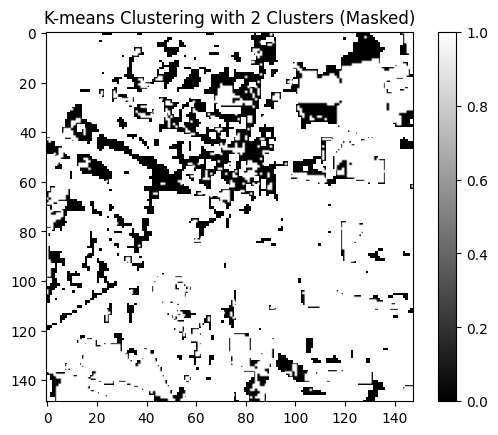

In [2]:
import numpy as np
import rasterio
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import subprocess
import os

carpeta_recortadas = "ImagenesRecortadas"
# Cargar las bandas necesarias
band5_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B5.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band6_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B6.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band7_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B7.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band4_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B4.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")

with rasterio.open(os.path.abspath(band5_path)) as band5:
    nir = band5.read(1).astype('float32')

with rasterio.open(band6_path) as band6:
    swir1 = band6.read(1).astype('float32')

with rasterio.open(band7_path) as band7:
    swir2 = band7.read(1).astype('float32')

with rasterio.open(band4_path) as band4:
    red = band4.read(1).astype('float32')

# Calcular NDBI
ndbi = (swir1 - nir) / (swir1 + nir)

# Calcular NDBaI
ndbai = (swir1 - swir2) / (swir1 + swir2)

# Calcular NIMI
ndmi = (swir1 - nir) / (swir1 + nir)

ndvi = (nir - red) / (nir + red)


mascara_vegetacion = ndvi > 0.3
# Crear un DataFrame con los índices calculados

# Aplicar las máscaras a los índices espectrales
masked_ndbi = np.where((mascara_vegetacion) & (ndbi > 0), np.nan, ndbi)
masked_ndbai = np.where(mascara_vegetacion, np.nan, ndbai)
masked_ndmi = np.where(mascara_vegetacion, np.nan, ndmi)

data = {
    'masked_NDBI': masked_ndbi.flatten(),
    'masked_NDBaI': masked_ndbai.flatten(),
    'masked_NIMI': masked_ndmi.flatten(),
}

df = pd.DataFrame(data).dropna()

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

# Obtener las etiquetas de los clusters
clusters = kmeans.labels_
print(np.unique(clusters))
clusters_full = np.full(masked_ndbi.shape, np.nan)
clusters_full[~(mascara_vegetacion)] = clusters

# Visualizar los clusters
plt.imshow(clusters_full, cmap='gray')
plt.colorbar()
plt.title('K-means Clustering with 2 Clusters (Masked)')
plt.show()

[0 1]


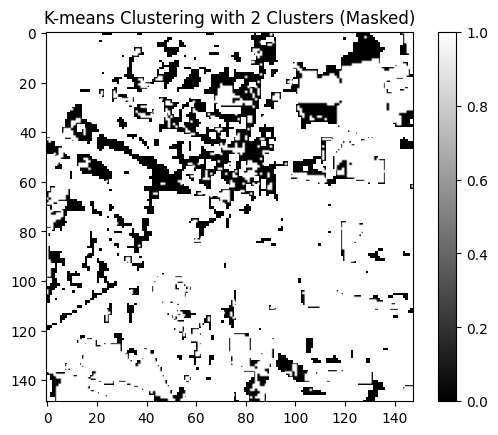

Estadísticas de NDBI por cluster:
Cluster 0: Mean NDBI = -0.0539, Std NDBI = 0.0369
Cluster 1: Mean NDBI = 0.0741, Std NDBI = 0.0421
Cluster correspondiente a áreas urbanas: 1
Cluster correspondiente a áreas no urbanas: 0


In [3]:
import numpy as np
import rasterio
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import subprocess
import os

carpeta_recortadas = "ImagenesRecortadas"
# Cargar las bandas necesarias
band5_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B5.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band6_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B6.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band7_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B7.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band4_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B4.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")

with rasterio.open(os.path.abspath(band5_path)) as band5:
    nir = band5.read(1).astype('float32')

with rasterio.open(band6_path) as band6:
    swir1 = band6.read(1).astype('float32')

with rasterio.open(band7_path) as band7:
    swir2 = band7.read(1).astype('float32')

with rasterio.open(band4_path) as band4:
    red = band4.read(1).astype('float32')

# Calcular NDBI
ndbi = (swir1 - nir) / (swir1 + nir)

# Calcular NDBaI
ndbai = (swir1 - swir2) / (swir1 + swir2)

# Calcular NIMI
ndmi = (swir1 - nir) / (swir1 + nir)

ndvi = (nir - red) / (nir + red)


mascara_vegetacion = ndvi > 0.3
# Crear un DataFrame con los índices calculados

# Aplicar las máscaras a los índices espectrales
masked_ndbi = np.where((mascara_vegetacion) & (ndbi > 0), np.nan, ndbi)
masked_ndbai = np.where(mascara_vegetacion, np.nan, ndbai)
masked_ndmi = np.where(mascara_vegetacion, np.nan, ndmi)

# Crear un DataFrame con los índices calculados
data = {
    'masked_NDBI': masked_ndbi.flatten(),
    'masked_NDBaI': masked_ndbai.flatten(),
    'masked_NIMI': masked_ndmi.flatten(),
}

df = pd.DataFrame(data).dropna()

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

# Obtener las etiquetas de los clusters
clusters = kmeans.labels_
print(np.unique(clusters))

# Crear una matriz de clusters completa para visualización
clusters_full = np.full(masked_ndbi.shape, np.nan)
clusters_full[~(mascara_vegetacion)] = clusters
# clusters_full[mascara_vegetacion] = clusters
# Visualizar los clusters
plt.imshow(clusters_full, cmap='gray')
plt.colorbar()
plt.title('K-means Clustering with 2 Clusters (Masked)')
plt.show()

# Calcular estadísticas de NDBI por cluster
ndbi_stats = []
for cluster_label in np.unique(clusters):
    ndbi_cluster = masked_ndbi[clusters_full == cluster_label]
    ndbi_mean = np.nanmean(ndbi_cluster)
    ndbi_std = np.nanstd(ndbi_cluster)
    ndbi_stats.append((cluster_label, ndbi_mean, ndbi_std))

# Imprimir estadísticas de NDBI por cluster
print("Estadísticas de NDBI por cluster:")
for label, mean, std in ndbi_stats:
    print(f"Cluster {label}: Mean NDBI = {mean:.4f}, Std NDBI = {std:.4f}")

# Identificar el cluster que corresponde a áreas urbanas
# Suponiendo que las áreas urbanas tienen valores de NDBI positivos
for label, mean, std in ndbi_stats:
    if mean > 0:  # Puedes ajustar este umbral según tus datos y criterios
        cluster_urbano = label
        break
else:
    cluster_urbano = None

if cluster_urbano is not None:
    cluster_no_urbano = 1 - cluster_urbano  # El otro cluster
    print(f"Cluster correspondiente a áreas urbanas: {cluster_urbano}")
    print(f"Cluster correspondiente a áreas no urbanas: {cluster_no_urbano}")
else:
    print("No se pudo identificar un cluster correspondiente a áreas urbanas. Revisa tus criterios.")


[0 1]


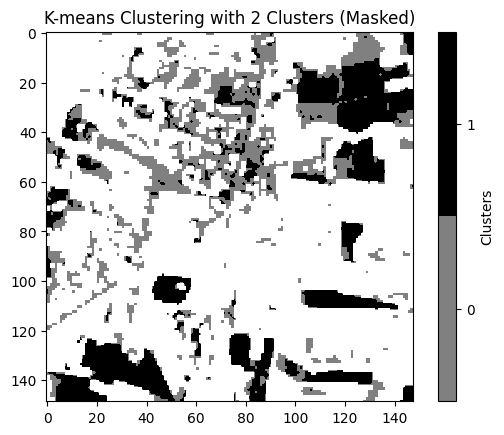

In [4]:
import numpy as np
import rasterio
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import subprocess
import os
from matplotlib.colors import ListedColormap

carpeta_recortadas = "ImagenesRecortadas"
# Cargar las bandas necesarias
band5_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B5.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band6_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B6.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band7_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B10.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
band4_path = subprocess.run(f"ls ../{carpeta_recortadas}/*B4.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")

with rasterio.open(os.path.abspath(band5_path)) as band5:
    nir = band5.read(1).astype('float32')

with rasterio.open(band6_path) as band6:
    swir1 = band6.read(1).astype('float32')

with rasterio.open(band7_path) as band7:
    swir2 = band7.read(1).astype('float32')

with rasterio.open(band4_path) as band4:
    red = band4.read(1).astype('float32')

# Calcular NDBI
ndbi = (swir1 - nir) / (swir1 + nir)

# Calcular NDBaI
ndbai = (swir1 - swir2) / (swir1 + swir2)

# Calcular NIMI
# nimi = (swir1 - nir) / (swir1 + nir)
ndmi = (nir-swir1) / (swir1 + nir)

ndvi = (nir - red) / (nir + red)

mascara_vegetacion = ndvi > 0.3
# Crear un DataFrame con los índices calculados

# Aplicar las máscaras a los índices espectrales
masked_ndbi = np.where((mascara_vegetacion) & (ndbi > 0), np.nan, ndbi)
masked_ndbai = np.where(mascara_vegetacion, np.nan, ndbai)
masked_ndmi = np.where(mascara_vegetacion, np.nan, ndmi)

# Crear un DataFrame con los índices calculados
data = {
    'masked_NDBI': masked_ndbi.flatten(),
    'masked_NDBaI': masked_ndbai.flatten(),
    'masked_NDMI': masked_ndmi.flatten(),
}

df = pd.DataFrame(data).dropna()

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

# Obtener las etiquetas de los clusters
clusters = kmeans.labels_
print(np.unique(clusters))

# Crear una matriz de clusters completa para visualización
clusters_full = np.full(masked_ndbi.shape, np.nan)
# clusters_full[mascara_vegetacion] = clusters
clusters_full[~(mascara_vegetacion)] = clusters

# Definir colores para cada cluster
colors = ['gray', 'black']  # Cambiar según los colores deseados para cada cluster

# Crear un colormap personalizado
cmap_custom = ListedColormap(colors)

# Visualizar los clusters con colormap personalizado
plt.imshow(clusters_full, cmap=cmap_custom)
plt.colorbar(ticks=[0, 1], boundaries=[-0.5, 0.5, 1.5], label='Clusters')
plt.title('K-means Clustering with 2 Clusters (Masked)')
plt.show()

# label_urbano = input("\tIngrese el label correspondiente a la zona urbana: ")

plt.close()


In [5]:
clusters_full

array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])

In [6]:
label_cluster = 0
clusters_full[np.isnan(clusters_full)] = not label_cluster
clusters_full

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

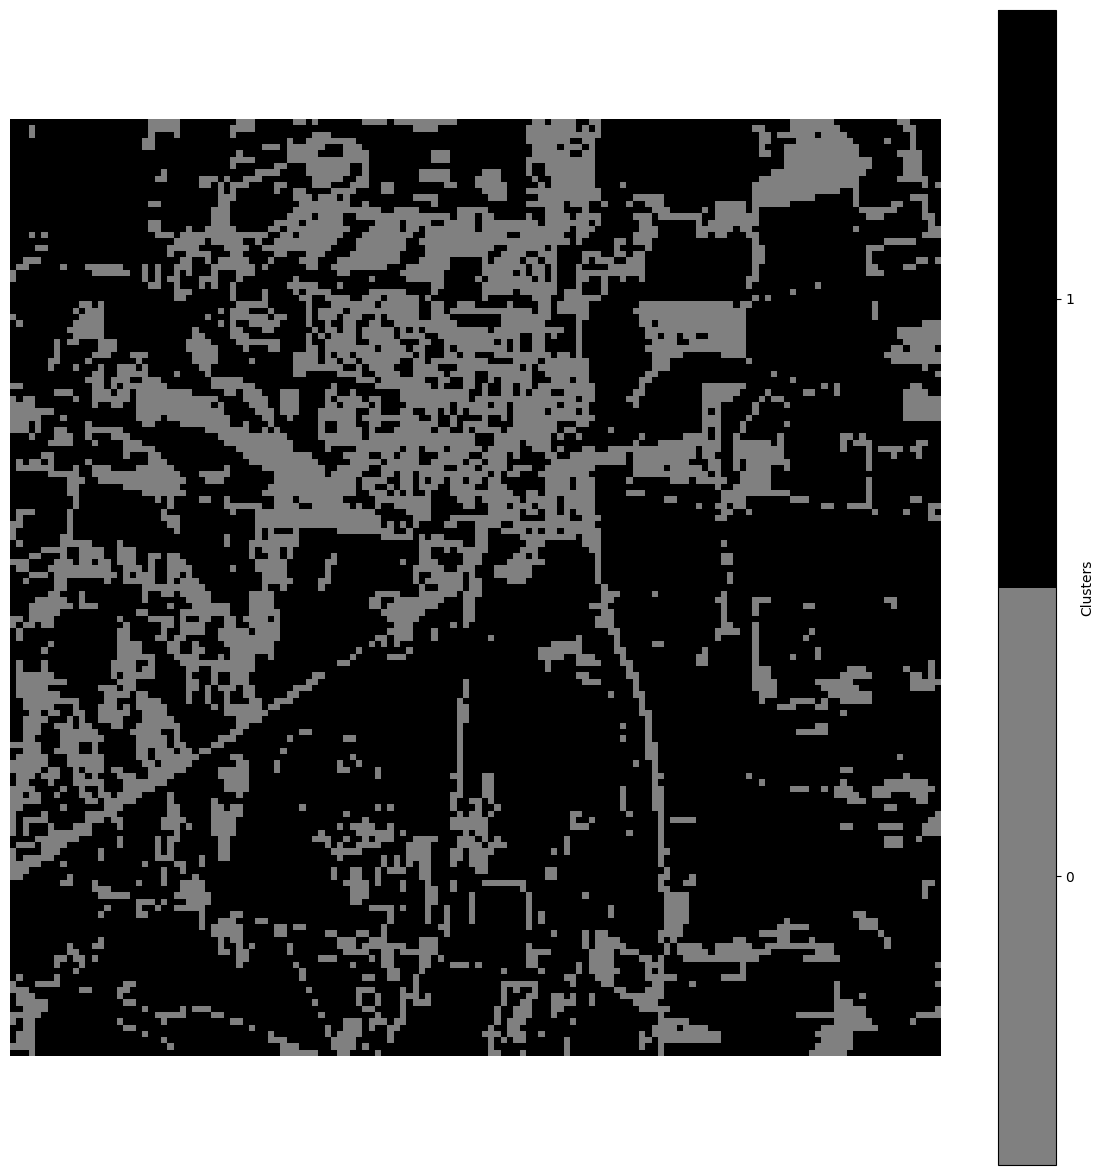

In [7]:
# Visualizar los clusters con colormap personalizado
plt.figure(figsize=(15,15))
plt.imshow(clusters_full, cmap=cmap_custom, interpolation="none")
plt.colorbar(ticks=[0, 1], boundaries=[-0.5, 0.5, 1.5], label='Clusters')
# plt.title('K-means Clustering con 2 Clusters (Enmascarado)')
plt.axis('off')
plt.savefig("ndbikmeans.png")
plt.show()


In [8]:
clusters_full
clusters_full = np.where(clusters_full == 0, True, False)
viviendas = clusters_full
clusters_full

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

149 148


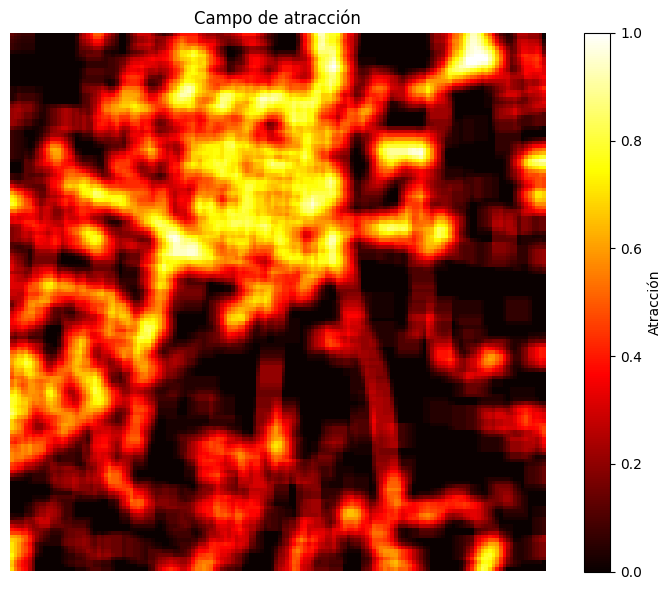

In [9]:

# Tamaño de la ventana (3 píxeles alrededor de cada píxel)
ventana_size = 3

# Crear un arreglo de atracción inicializado con ceros
atraccion = np.zeros_like(viviendas, dtype=float)

# Obtener dimensiones del arreglo de viviendas
filas, columnas = viviendas.shape

print(filas, columnas)

# Iterar sobre cada píxel del arreglo de viviendas
for i in range(filas):
    for j in range(columnas):
        # Si el píxel contiene una vivienda, verificar la ventana 90x90
        viviendas_vecinas = 0
        vecinas = 0
        for di in range(-ventana_size, ventana_size + 1):
            for dj in range(-ventana_size, ventana_size + 1):
                ni, nj = i + di, j + dj
                # Verificar límites del arreglo
                if 0 <= ni < filas and 0 <= nj < columnas:
                    vecinas += 1
                    if viviendas[ni, nj]:
                        viviendas_vecinas += 1
        
        atraccion[i, j] = 1 * (viviendas_vecinas/vecinas)


# Crear un heatmap de atracción
plt.figure(figsize=(8, 6))
plt.imshow(atraccion, cmap='hot', interpolation='nearest')
plt.colorbar(label='Atracción')
plt.title('Campo de atracción')
plt.axis('off')
plt.tight_layout()
plt.savefig('campoDeAtraccion.png')
plt.show()